# DATA COLLECTION

1. kaggle
2. uci ml repository
3. google dataset search

In [ ]:
import pandas as pd

loading a dataset to a pandas dataframe

In [ ]:
dt = pd.read_csv('/content/boston.csv')

In [ ]:
dt.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# IMPORTING DIRECTLY FROM KAGGLE

So as not to download it on my comp

In [ ]:
# installing the kaggle library
! pip install kaggle

upload your kaggle.json file

In [ ]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

importing the earthquake dataset

In [ ]:
#api to fetch the dataset from kaggle
!kaggle competitions download -c LANL-Earthquake-Prediction

 99% 2.25G/2.27G [00:25<00:00, 25.5MB/s]
100% 2.27G/2.27G [00:25<00:00, 95.0MB/s]


In [ ]:
# extracting the compressed dataset
from zipfile import ZipExtFile
dataset = 'path'
with ZipFile(dataset.'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

SyntaxError: invalid syntax (<ipython-input-1-310201ac8937>, line 4)

# HANDLING MISSING VALUES

1. imputation
2. dropping

In [ ]:
# importing the library
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [ ]:
# loading the dataset
dt = pd.read_csv('/content/Placement_Dataset.csv')

In [ ]:
dt.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
dt.shape

(215, 15)

In [ ]:
dt.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


in large datasets(20k-1akh) datapoints we can DROP the datasets

but here(200-30-400) datapoints (small datasets)
we need IMPUTATION

imputation= replacing the nan values with sttsitical data, (mean,median,mode)

<ipython-input-15-c7bd37e054be>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['salary'])


<Axes: xlabel='salary', ylabel='Density'>

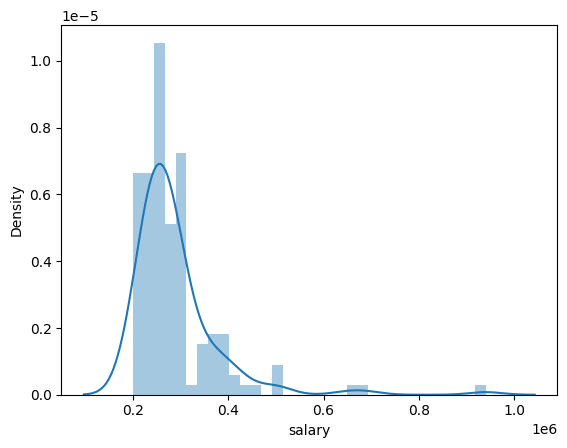

In [ ]:
# analyse distribution of data in salary column to decide what to replace (mean,median or mode)

sns.distplot(dt['salary'])

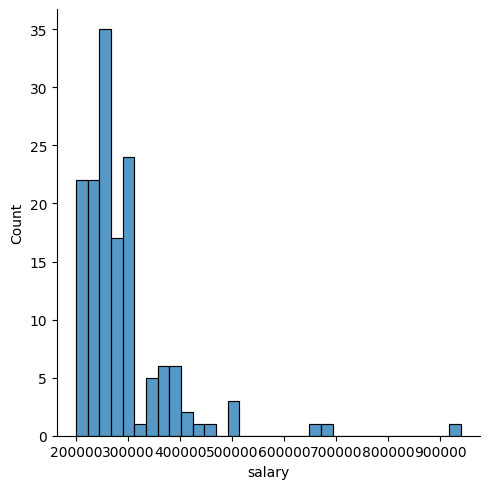

In [ ]:
sns.displot(dt.salary)

<Axes: xlabel='salary', ylabel='Count'>

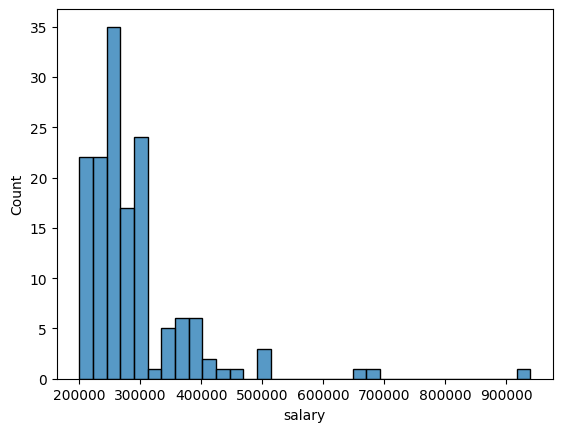

In [ ]:
sns.histplot(dt.salary)

This is a skewed curve as there are 2 values near 6 lakh and 9 lakh which are outliers
So here mean cannot be used as this will ruin the data(mean is used where the data is evenly spread0

Here we need to use median or mode

In [ ]:
#replace with median

dt['salary'].fillna(dt['salary'].median(),inplace=True)
dt.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
dt.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [ ]:
# filling with mean
dt.salary.fillna(dt.salary.mean(), inplace=True)
dt.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


dropping method

In [ ]:
sal_dt = pd.read_csv('/content/Placement_Dataset.csv')

In [ ]:
sal_dt=sal_dt.dropna(how='any')

In [ ]:
sal_dt.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [ ]:
sal_dt.shape

(148, 15)

# Data cleaning and train test split
The process of standardizing data to a common format and common range

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
dt = sklearn.datasets.load_breast_cancer()

In [ ]:
print(dt)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

in this dataset the first rows are the datas of the features

the next few 0 and 1 are the target or output i.e malignant or benign

the next few rows are the feature names

In [ ]:
# loading data to pandas dataframe
df = pd.DataFrame(dt.data, columns=dt.feature_names)

In [ ]:
df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.insert(1,'malin',dt.target)
print(df)

     mean radius  malin  mean texture  mean perimeter  mean area  \
0          17.99      0         10.38          122.80     1001.0   
1          20.57      0         17.77          132.90     1326.0   
2          19.69      0         21.25          130.00     1203.0   
3          11.42      0         20.38           77.58      386.1   
4          20.29      0         14.34          135.10     1297.0   
..           ...    ...           ...             ...        ...   
564        21.56      0         22.39          142.00     1479.0   
565        20.13      0         28.25          131.20     1261.0   
566        16.60      0         28.08          108.30      858.1   
567        20.60      0         29.33          140.10     1265.0   
568         7.76      1         24.54           47.92      181.0   

     mean smoothness  mean compactness  mean concavity  mean concave points  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474     

In [ ]:
df.drop(columns=['malin'])

KeyError: "['malin'] not found in axis"

In [ ]:
x=df
y=dt.target

In [ ]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

* Splitting the data into train and test data

test size set to 20% of data and random state is just a way of splitting data into a specific set

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2, random_state =3)

In [ ]:
x_train.shape

(455, 31)

In [ ]:
print(x_train)

     mean radius  malin  mean texture  mean perimeter  mean area  \
280        19.16      0         26.60          126.20     1138.0   
186        18.31      0         18.58          118.60     1041.0   
437        14.04      1         15.98           89.78      611.2   
329        16.26      0         21.88          107.50      826.8   
201        17.54      0         19.32          115.10      951.6   
..           ...    ...           ...             ...        ...   
480        12.16      1         18.03           78.29      455.3   
422        11.61      1         16.02           75.46      408.2   
119        17.95      0         20.01          114.20      982.0   
256        19.55      0         28.77          133.60     1207.0   
249        11.52      1         14.93           73.87      406.3   

     mean smoothness  mean compactness  mean concavity  mean concave points  \
280          0.10200           0.14530         0.19210              0.09664   
186          0.08588     

# Standadardising the data

Normally we need to standardise data before splitting into train and test

standardising- removing or doing something to the outlier values

In [ ]:
print(dt.data.std())

228.29740508276657


if the data has all values in same range(standardised) the std devn should be 1


here it is 228 so it is not and it varies a lot

In [ ]:
scaler = StandardScaler()

this fits the data and now we need to transform the data based on this scale

In [ ]:
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train_stand = scaler.transform(x_train)

In [ ]:
print(x_train_stand)

[[ 1.40381088 -1.28271152  1.79283426 ...  1.044121    0.52295995
   0.64990763]
 [ 1.16565505 -1.28271152 -0.14461158 ...  0.5940779   0.44153782
  -0.85281516]
 [-0.0307278   0.77959852 -0.77271123 ... -0.64047556 -0.31161687
  -0.69292805]
 ...
 [ 1.06478904 -1.28271152  0.20084323 ...  0.01694621  3.06583565
  -1.29952679]
 [ 1.51308238 -1.28271152  2.3170559  ...  1.14728703 -0.16599653
   0.82816016]
 [-0.73678981  0.77959852 -1.02636686 ... -0.31826862 -0.40713129
  -0.38233653]]


so now the values are in a similar range

now to tranform the test data again we dont fit the scaler according to the test data
we simply transform the data according to the scale of the train data since the test data is very small

In [ ]:
x_test_stand = scaler.transform(x_test)

In [ ]:
print(x_train_stand.std())

1.0
1.0


In [ ]:
print(x_test_stand.std())

0.8703069444816256


so now the std devn is 1 and 0.8 which is good as it should be ~1
the test data is 0.8 as we have transformed it acc to the scale of train data

#Label Encoding

converting the labels into numeric form

diabetic or non diabetic to 1 and 0

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
dt = pd.read_csv('/content/breast_cancer_data.csv')

In [ ]:
dt.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


diagnosis m=malignant b=benign

In [ ]:
dt['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
#load labelencoder fxn
label_encode = LabelEncoder()

In [ ]:
labels= label_encode.fit_transform(dt.diagnosis)

all the values of m and b is stored in labels and now we append some other label to dataframe

In [ ]:
#adding a new column 'target'
dt['target']=labels

In [ ]:
dt.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,target
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


b<m so b=0 and m=1 this is how encoding is done

In [ ]:
dt.drop(columns='diagnosis',inplace=True)


KeyError: "['diagnosis'] not found in axis"

In [ ]:
dt['target'].value_counts()

,count
target,
0,357
1,212


# Train Test Split